<a href="https://colab.research.google.com/github/stefdepr/deep_learning/blob/main/deeplabv3%2B(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deeplabv3+

In [ ]:
# gain access to google colab

from google.colab import drive
drive.mount('/content/gdrive')

import os

Mounted at /content/gdrive


# Initialization

Libraries

In [ ]:
import tensorflow as tf
import zipfile
import numpy as np
import random
import os
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras import backend as K
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
import keras
tf.config.run_functions_eagerly(True)

import warnings
warnings.filterwarnings('ignore')

Constants

In [ ]:
SEED = 42
np.random.seed = SEED

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

Helper functions

# Data preparation

**Restore pre-prepared data.**
<br>Retrieve data (split originating from other notebook).

In [ ]:
# X_train
X_train_file = open("/content/gdrive/MyDrive/Final_Assignment_models/data/X_train.txt", "rb")
X_train = np.load(X_train_file)
X_train_file.close()

# Y_train
Y_train_file = open("/content/gdrive/MyDrive/Final_Assignment_models/data/Y_train.txt", "rb")
Y_train = np.load(Y_train_file)
Y_train_file.close()

# X_val
X_val_file = open("/content/gdrive/MyDrive/Final_Assignment_models/data/X_val.txt", "rb")
X_val = np.load(X_val_file)
X_val_file.close()

# Y_val
Y_val_file = open("/content/gdrive/MyDrive/Final_Assignment_models/data/Y_val.txt", "rb")
Y_val = np.load(Y_val_file)
Y_val_file.close()

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(542, 256, 256, 3)
(542, 256, 256, 1)
(61, 256, 256, 3)
(61, 256, 256, 1)


In [ ]:
X_train_aug = list(X_train)

Y_train_aug = list(Y_train)



for i in range(X_train.shape[0]):

  img = X_train[i]

  mask = Y_train[i]

  # Pick a random augmentation method

  x = random.choice([0, 1, 2])



  if x == 0:

    new_img = np.rot90(img)

    new_mask = np.rot90(mask)



  if x == 1:

    new_img= np.transpose(img, (1, 0, 2))

    new_mask = np.transpose(mask, (1, 0, 2))



  if x == 2:

    new_img1 = np.rot90(img)

    new_mask1 = np.rot90(mask)

    new_img = np.rot90(new_img1)

    new_mask = np.rot90(new_mask1)



  X_train_aug.append(new_img)

  Y_train_aug.append(new_mask)




X_train_aug = np.asarray(X_train_aug)

Y_train_aug = np.asarray(Y_train_aug)



print(len(X_train_aug))

print(len(X_train))

1084
542


**Plot some training images**

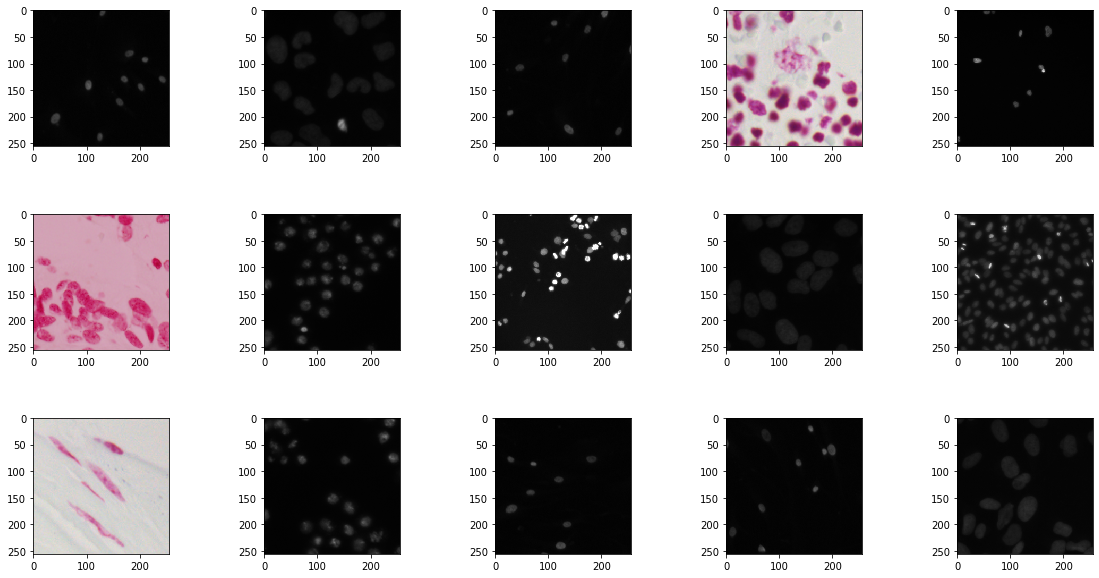

In [ ]:
f = plt.figure(figsize=(20,10))
for idx in range(15):
    plt.subplot(3,5,idx+1)
    plt.subplots_adjust(hspace=0.5)
    plt.imshow(X_train[idx],  interpolation='None')

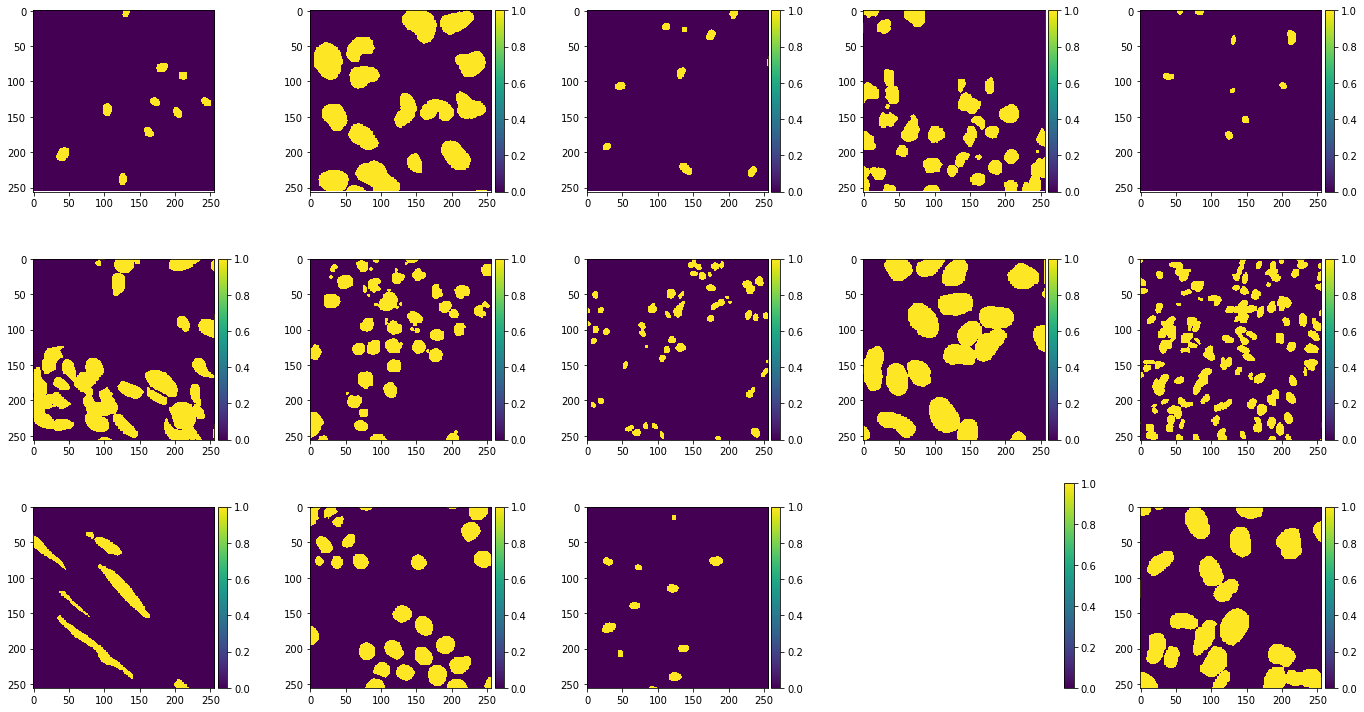

In [ ]:
f = plt.figure(figsize=(20,10))
for idx in range(15):
    plt.subplot(3,5,idx+1)
    plt.subplots_adjust(hspace=0.5)
    imshow(np.squeeze(1*Y_train[idx]))

**Plot some validation images**

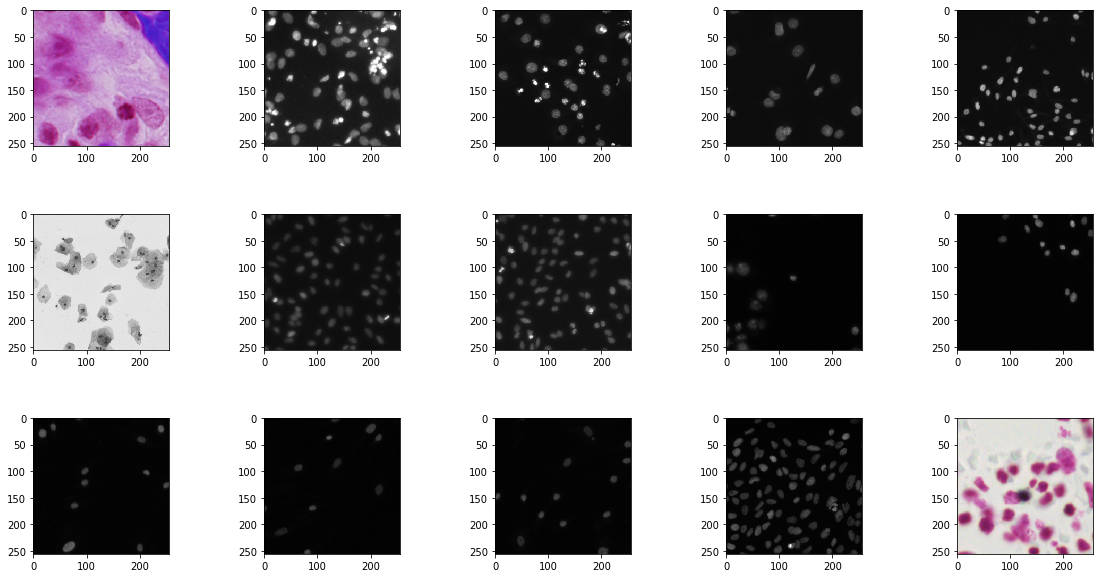

In [ ]:
f = plt.figure(figsize=(20,10))
for idx in range(15):
    plt.subplot(3,5,idx+1)
    plt.subplots_adjust(hspace=0.5)
    plt.imshow(X_val[idx],  interpolation='None')

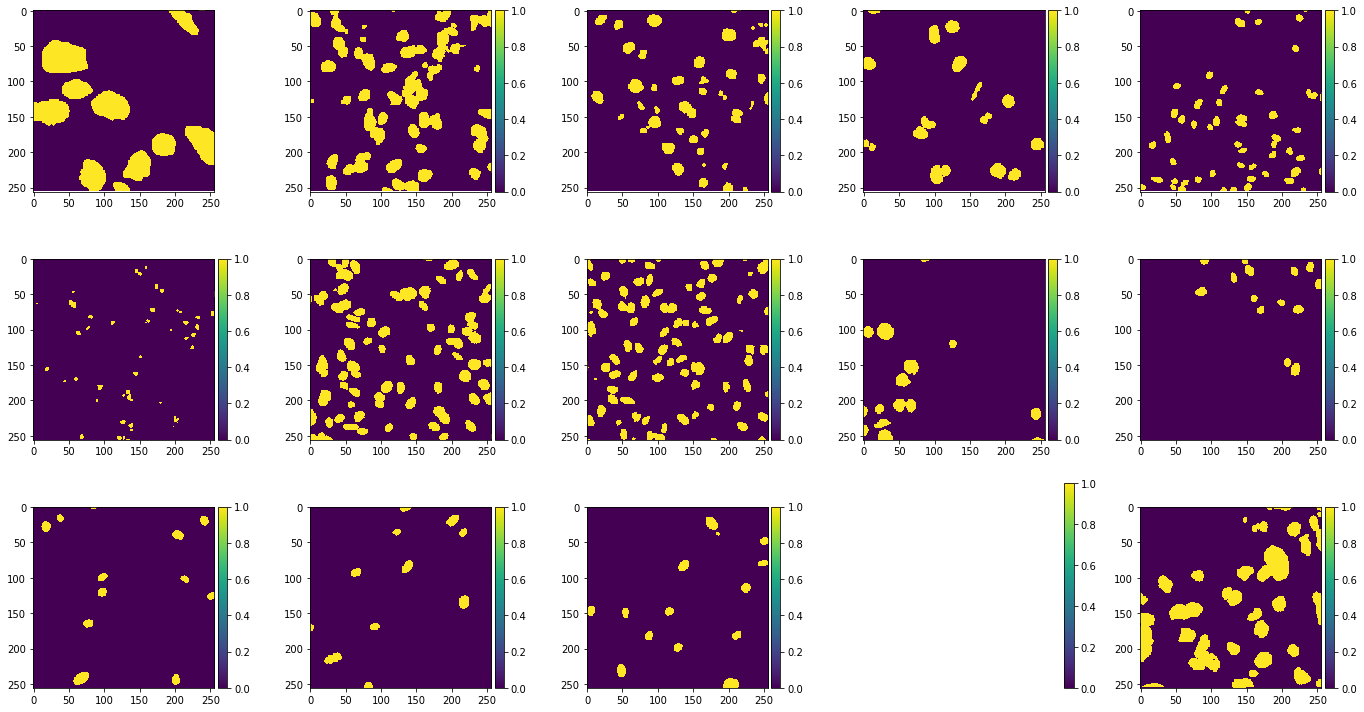

In [ ]:
f = plt.figure(figsize=(20,10))
for idx in range(15):
    plt.subplot(3,5,idx+1)
    plt.subplots_adjust(hspace=0.5)
    imshow(np.squeeze(1*Y_val[idx]))


# Metrics

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

# Model training

In [ ]:
import tensorflow
#!pip install tensorflow
from tensorflow.keras.models import Sequential

model8 = Sequential()
model8.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:], padding='same'))
model8.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
#model8.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(tensorflow.keras.layers.Dropout(0.2))
model8.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(tensorflow.keras.layers.Dropout(0.5))
#model8.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
#model8.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(tensorflow.keras.layers.Dropout(0.5))
model8.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(tensorflow.keras.layers.Dropout(0.2))
model8.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(tf.keras.layers.Conv2D(filters=Y_train.shape[-1], kernel_size=(3, 3), activation='sigmoid', padding='same'))
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 256, 256, 64)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 128)     73856     
                                                                 
 dropout_1 (Dropout)         (None, 256, 256, 128)     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 128)     1

In [ ]:
from typing_extensions import Concatenate
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Dropout
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input

inputs = tf.keras.layers.Input(shape=(256,256,3))

encoder = ResNet50(weights=None, include_top= False, input_tensor=inputs)

image_features = encoder.get_layer("conv4_block6_out").output

#we construct the bridge between encoder and decoder: ASPP
print(inputs)
print(image_features)

#image pooling
shape = image_features.shape
y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(image_features)
y1 = Conv2D(256,1,padding='same', use_bias = False)(y1)
y1 = BatchNormalization()(y1)
y1 = Activation("relu")(y1)
y1 = UpSampling2D((shape[1],shape[2]), interpolation='bilinear')(y1)
print(y1.shape) #16,16,256 -> 256 comes from filtersize cpnv2d

#1x1 conv
y2 = Conv2D(256,1,padding='same', use_bias = False,name='1x1_conv')(image_features)
y2 = BatchNormalization()(y2)
y2 = Activation("relu")(y2)

#increase the receptive field of the convolution layer
#3x3 conv rate = 6
y3 = Conv2D(512,3,padding='same', use_bias = False, dilation_rate = 6, name='dil_rate_6')(image_features)
y3 = BatchNormalization()(y3)
#y3 = Dropout(0.3)(y3)
y3 = Activation("relu")(y3)

#3x3 conv rate = 12
y4 = Conv2D(256,3,padding='same', use_bias = False, dilation_rate = 12, name='dil_rate_12')(image_features)
y4 = BatchNormalization()(y4)
#y4 = Dropout(0.3)(y4)
y4 = Activation("relu")(y4)

#3x3 conv rate = 18
y5 = Conv2D(256,3,padding='same', use_bias = False, dilation_rate = 18,name='dil_rate_18')(image_features)
y5 = BatchNormalization()(y5)
#y5 = Dropout(0.3)(y5)
y5 = Activation("relu")(y5)

print(y5.shape)

y = tf.keras.layers.concatenate(([y1,y2,y3,y4,y5]))
y = Conv2D(256, 1, padding='same', use_bias=False,name='conc_of_all_ys')(y)
y= BatchNormalization()(y)
y = Activation('relu')(y)

x_a = UpSampling2D((4,4), interpolation = 'bilinear')(y)
#shape x_a = (None, 64, 64, 256)

#extract low level features
x_b = encoder.get_layer("conv2_block2_out").output
x_b = Conv2D(48,1,padding='same', use_bias = False)(x_b)
x_b = BatchNormalization()(x_b)
x_b = Activation("relu")(x_b)

x = tf.keras.layers.concatenate(([x_a,x_b]))
#print(x.shape) = (None, 64, 64, 304) output channels became 304

x = Conv2D(256,3,padding='same', use_bias = False)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
#print(x.shape) = (None, 64, 64, 256)

x = Conv2D(256,3,padding='same', use_bias = False)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = UpSampling2D((4,4), interpolation = 'bilinear')(x)
#print(x.shape) = (None, 256, 256, 256)
x = Conv2D(1,1)(x)
x = Activation("sigmoid")(x)
#print(x.shape) = (None, 256, 256, 1) predicted mask

model_deeplabv3 = Model(inputs, x)
model_deeplabv3.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 1024), dtype=tf.float32, name=None), name='conv4_block6_out/Relu:0', description="created by layer 'conv4_block6_out'")
(None, 16, 16, 256)
(None, 16, 16, 256)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                        

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005) 
model_deeplabv3.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=jaccard_coef)


In [ ]:
history = model_deeplabv3.fit(X_train_aug, Y_train_aug, epochs=15,
                    validation_data=(X_val, Y_val), batch_size = 8)


Epoch 1/15
  1/136 [..............................] - ETA: 2:12:04 - loss: 0.9671 - jaccard_coef: 0.1786

In [ ]:
# Callbacks
checkpoiter = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose = 1, save_best_only = True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir = 'logs')
            ]

In [ ]:
train_IoU = history.history['jaccard_coef']
val_IoU = history.history['val_jaccard_coef']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,8))
plt.plot(train_IoU, label='Train IOU')
plt.plot(val_IoU,'--', label='Val IOU')
plt.title('Training and Validation mean IOU')
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 15))
plt.grid()
plt.legend();

plt.figure(figsize=(12,8))
plt.plot(loss, label='loss')
plt.plot(val_loss,'--', label='val loss')
plt.title('Training and Validation loss')
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 15))
plt.grid()
plt.legend();

# Prediction and Visualization

In [ ]:
preds_train = model_deeplabv3.predict(X_train, verbose = 1)
preds_val = model_deeplabv3.predict(X_val, verbose = 1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [ ]:
# Sanity check on random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(1*Y_train[ix])) # bugfix: had to multiply with 1, in order to convert boolean array to int array for visualization
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

In [ ]:
# Sanity check on random training samples
ix = random.randint(0, len(preds_val_t))
imshow(X_val[ix])
plt.show()
imshow(np.squeeze(1*Y_val[ix])) # bugfix: had to multiply with 1, in order to convert boolean array to int array for visualization
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

In [ ]:
for i in range(5):

    idx = np.random.randint(1, len(X_val))

    img = X_val[idx]

    img = img[np.newaxis, :, :, :]

    pred = model_deeplabv3.predict(img)

    plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)

    plt.imshow(np.squeeze(img))

    plt.title('Image')

    plt.subplot(1, 3, 2)

    plt.imshow(np.squeeze(Y_val[idx]))

    plt.title('Mask')

    plt.subplot(1, 3, 3)

    plt.imshow(np.squeeze(pred) > .5)

    plt.title('Prediction')

    plt.show()